In [1]:
require(data.table)

Loading required package: data.table


# Data mining, Marshalkin Nikita

## Table of contents:
- [Assignment 1, feature types](#a1)
- [Assignment 2, data sources](#a2)
- [Assignment 3, preparation](#a3)
- [Assignment 4, descriptive statistics](#a4)
- [Assignment 5, visualization](#a5)
- [Assignment 6, time series](#a6)
- [Assignment 7, exponential smoothing](#a7)

 <a id='a1'></a>
## Assignment 1, feature types

| Feature Name | Type |
| - | - |
| Color | nominal scale |
| Maximal.speed | ratio scale |
| False.start | dichotomous scale |
| Place.in.the.competition | ordinal scale |
| Birth.day | interval scale |
| Birth.month | interval scale |
| Birth.year | interval scale |




In [2]:
data <- read.csv("Humsters.csv")

In [3]:
data

Name           Color            Maximal.speed False.start
1  Boo Bear       Beige            1.576113      0          
2  Lovebug        Black            2.428636      0          
3  Sugar Cookie   Sable            3.560036      0          
4  Skittles       Sable            2.446361      0          
5  Bunny          Beige            3.835057      0          
6  Gingersnap     Dark eared white 4.102686      0          
7  Paws           Beige            1.801966      0          
8  Tigger         Dark eared white 3.159759      0          
9  Bebe           Cream            2.780990      0          
10 Butterscotch   Sable            1.387136      1          
11 Brown Sugar    Black            3.777369      0          
12 Snowball       Black            2.631957      0          
13 Sweety         Ruby eyed cream  2.600739      0          
14 Snookums       Sable            3.604193      0          
15 Whiskers       Cinnamon         3.086358      0          
16 Chocolate Chip Cinnamon         2.845990      0          
17 Fufu           Beige            3.496049      0          
18 Cocoa          Red eyed cream   2.923928      0          
   Place.in.the.competition Birth.day Birth.month Birth.year
1   7                       28         9          2015      
2  14                        1         5          2015      
3   2                       28        11          2017      
4  11                       26         9          2016      
5   4                        3         1          2016      
6   8                       19         8          2017      
7   3                       18        10          2016      
8   5                       20         4          2016      
9  17                       11        11          2017      
10  1                        7         9          2015      
11 13                        9        11          2016      
12  9                       19         3          2016      
13 16                       19         6          2016      
14  6                       20         4          2017      
15 12                       20         7          2017      
16 15                       24        10          2015      
17 10                        2         5          2016      
18 18                       11         3          2016

 <a id='a2'></a>
## Assignment 2, data sources

Source: https://archive.ics.uci.edu/ml/datasets/iris

In [4]:
iris <- fread("iris.data", sep = ",", header = F)
names(iris) = c("sepal.length", "sepal.width", "petal.length", "petal.width", "class")

In [5]:
head(iris)

sepal.length sepal.width petal.length petal.width class      
1 5.1          3.5         1.4          0.2         Iris-setosa
2 4.9          3.0         1.4          0.2         Iris-setosa
3 4.7          3.2         1.3          0.2         Iris-setosa
4 4.6          3.1         1.5          0.2         Iris-setosa
5 5.0          3.6         1.4          0.2         Iris-setosa
6 5.4          3.9         1.7          0.4         Iris-setosa

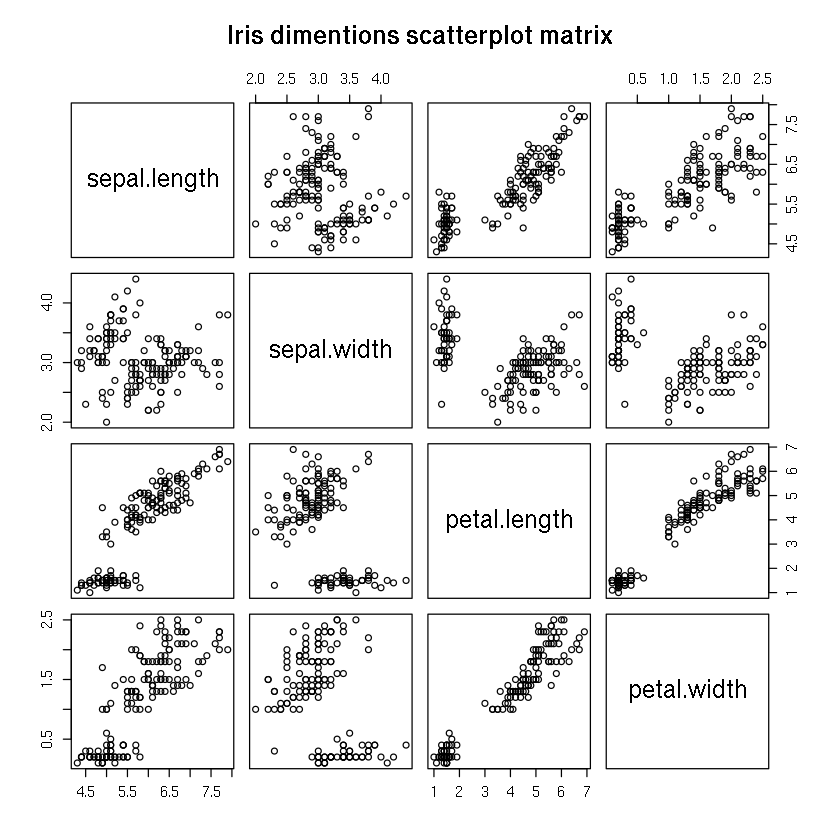

In [6]:
pairs(~sepal.length + sepal.width + petal.length + petal.width, data = iris, 
   main="Iris dimentions scatterplot matrix")

#### Australian wines

Source: Australian Bureau of Statistics

JAN 1980 - JUN 1994.

| Feature | Description |
| :-- | :-- |
| fort | Fortified wine (kilolitre) |
| dry | Dry wine (kilolitre) |
| sweet | Sweet wine (kilolitre) | 
| red | Red wine (kilolitre) | 
| rose | Rose wine (kilolitre) | 
| spark | Sparkling wine (kilolitre) |
| total | Total sales (bottles) |

In [7]:
wine <- fread("wine_Austral.data", header = T)

In [8]:
head(wine)

fort dry  sweet red  rose spark total year_ month_ date_   
1 2585 1954  85    464 112  1686  15136 1980  1      JAN 1980
2 3368 2302  89    675 118  1591  16733 1980  2      FEB 1980
3 3210 3054 109    703 129  2304  20016 1980  3      MAR 1980
4 3111 2414  95    887  99  1712  17708 1980  4      APR 1980
5 3756 2226  91   1139 116  1471  18019 1980  5      MAY 1980
6 4216 2725  95   1077 168  1377  19227 1980  6      JUN 1980

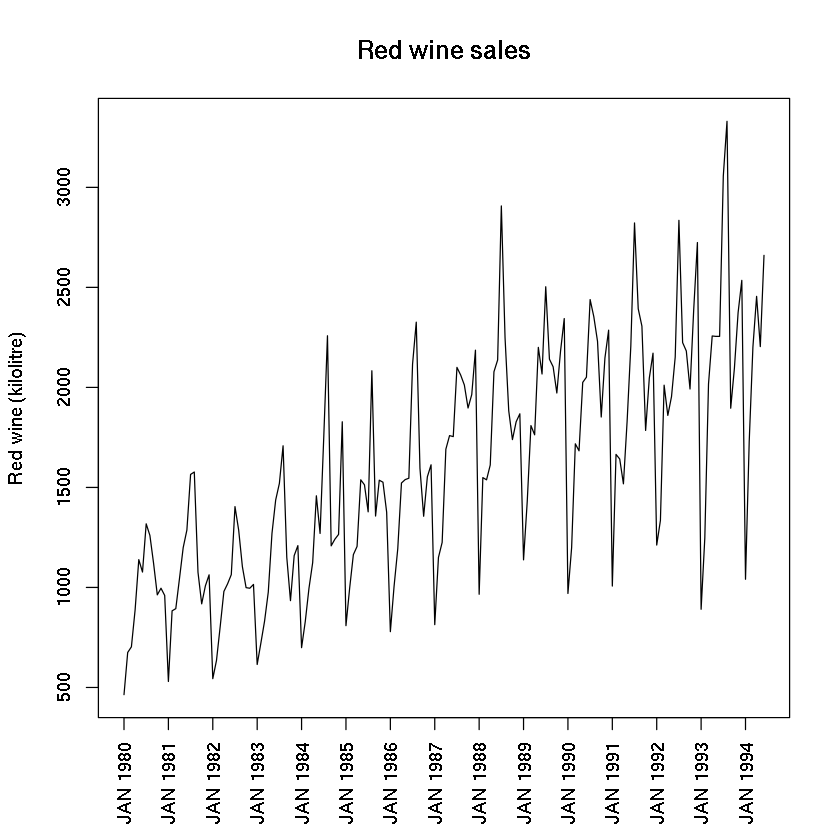

In [9]:
plot(wine$red, type = "l", ylab="Red wine (kilolitre)", main="Red wine sales", xaxt='n', xlab = NA)
axis(1, at=seq(1, length(wine$red), by=12), labels=wine$date_[seq(1, length(wine$red), by=12)], las=2)

 <a id='a3'></a>
## Assignment 3, preparation

Sample variance

In [10]:
var(iris$sepal.width)

[1] 0.188004

Sample diviation

In [11]:
sd(iris$sepal.width)

[1] 0.4335943

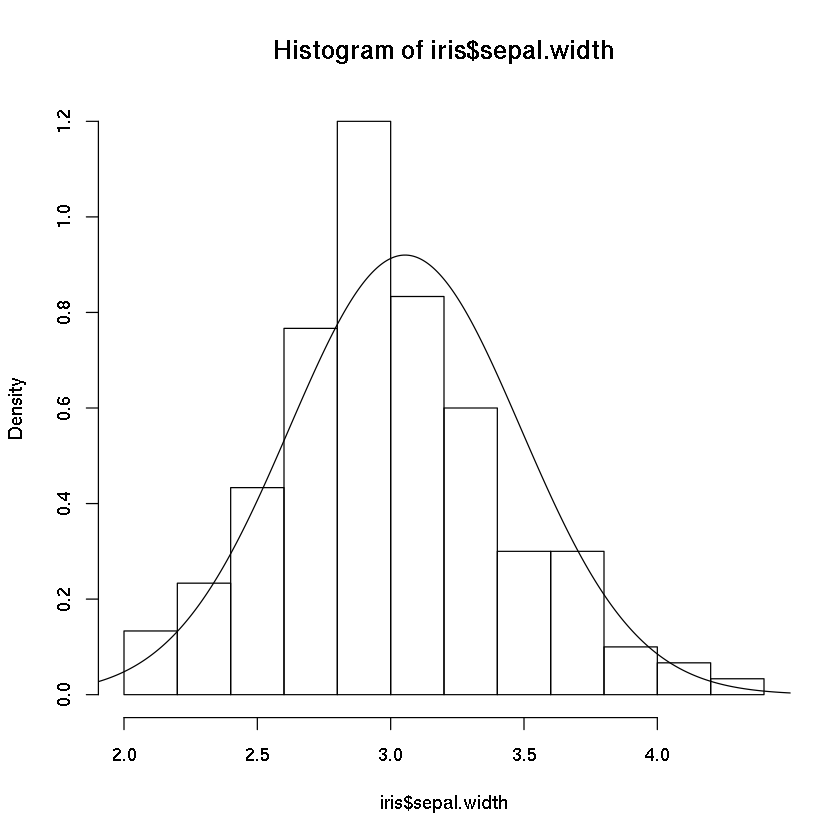

In [12]:
hist(iris$sepal.width, freq = F)
x <- seq(1, 5, length = 1000)
y <- dnorm(x, mean = mean(iris$sepal.width), sd = sd(iris$sepal.width))
lines(x, y)

In [13]:
cor <- c(iris$sepal.width, 100)
var(cor)
sd(cor)

[1] 62.42865

[1] 7.90118

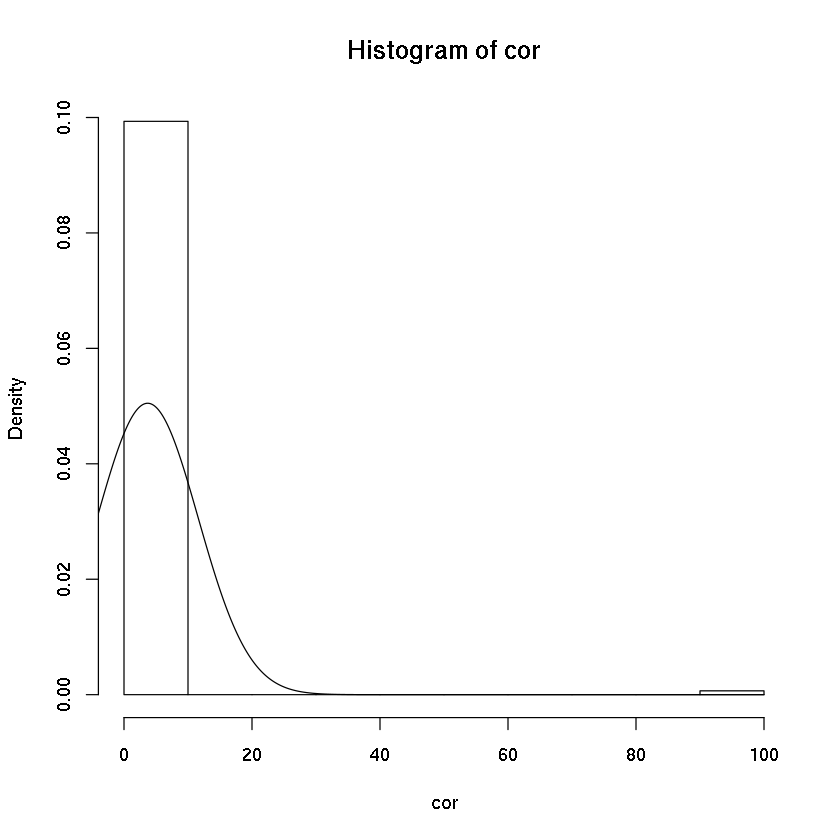

In [14]:
hist(cor, freq = F)
x <- seq(-10, 100, length = 1000)
y <- dnorm(x, mean = mean(cor), sd = sd(cor))
lines(x, y)

 <a id='a4'></a>
## Assignment 4, descriptive statistics

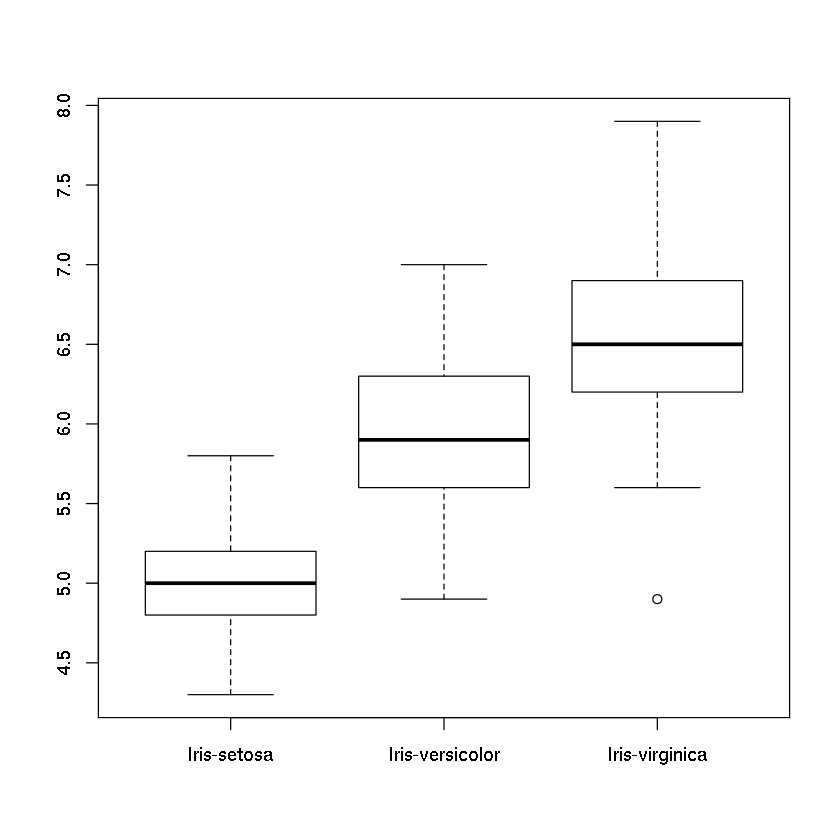

In [15]:
boxplot(iris$sepal.length ~ iris$class)

 <a id='a5'></a>
## Assignment 5, visualization

In [16]:
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec")

In [17]:
sparkling.mean <- aggregate(wine$spark, by=list(wine$month_), mean)

In [18]:
sparkling.mean

Group.1 x       
1   1      1614.000
2   2      1593.667
3   3      1863.400
4   4      1767.133
5   5      1597.400
6   6      1458.933
7   7      1958.000
8   8      2263.000
9   9      2112.786
10 10      2997.714
11 11      4126.286
12 12      5799.857

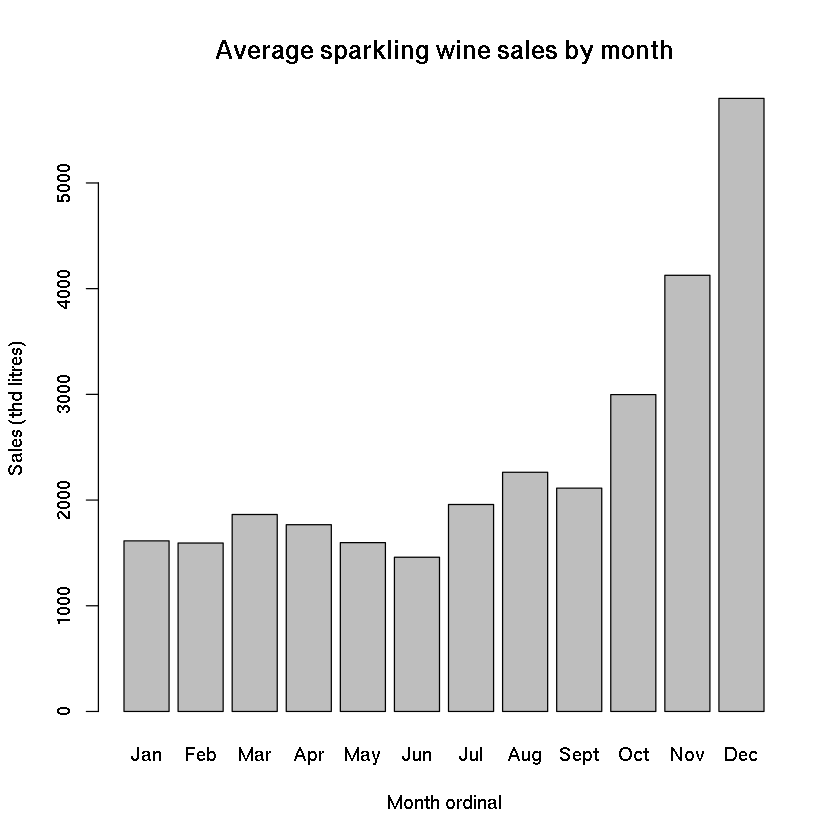

In [19]:
barplot(height = sparkling.mean$x, names.arg = months[sparkling.mean$Group.1], main = "Average sparkling wine sales by month", xlab = "Month ordinal", ylab = "Sales (thd litres)")  

In [20]:
length(wine$red)

[1] 174

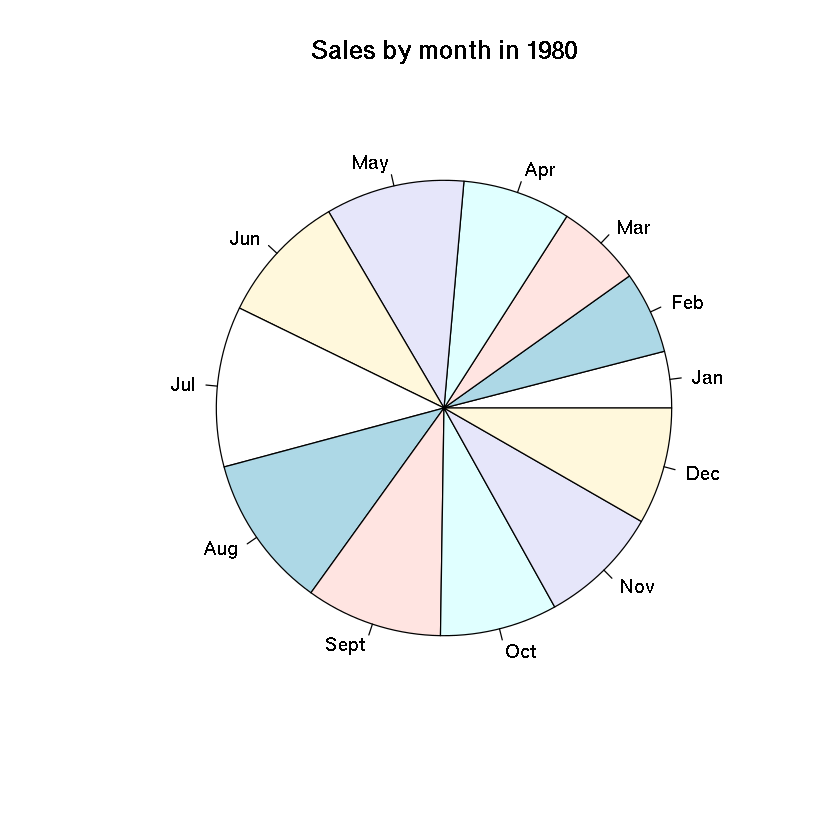

In [21]:
pie(wine$red[1:12], labels = months, main="Sales by month in 1980")

 <a id='a6'></a>
## Assignment 6, time series

In [22]:
time <- 1:192
month.01 <- rep(c(1,0,0,0,0,0,0,0,0,0,0,0), 16)                                                                                                
month.02 <- rep(c(0,1,0,0,0,0,0,0,0,0,0,0), 16)                                                                                                
month.03 <- rep(c(0,0,1,0,0,0,0,0,0,0,0,0), 16)                                                                                                
month.04 <- rep(c(0,0,0,1,0,0,0,0,0,0,0,0), 16)                                                                                                
month.05 <- rep(c(0,0,0,0,1,0,0,0,0,0,0,0), 16)                                                                                                
month.06 <- rep(c(0,0,0,0,0,1,0,0,0,0,0,0), 16)                                                                                                
month.07 <- rep(c(0,0,0,0,0,0,1,0,0,0,0,0), 16)                                                                                                
month.08 <- rep(c(0,0,0,0,0,0,0,1,0,0,0,0), 16)                                                                                                
month.09 <- rep(c(0,0,0,0,0,0,0,0,1,0,0,0), 16)                                                                                                
month.10 <- rep(c(0,0,0,0,0,0,0,0,0,1,0,0), 16)                                                                                                
month.11 <- rep(c(0,0,0,0,0,0,0,0,0,0,1,0), 16)                                                                                                
month.12 <- rep(c(0,0,0,0,0,0,0,0,0,0,0,1), 16)

In [23]:
wine.dry <- wine$dry
wine.dry[176:192] <- NA

In [24]:
wine.dry.table <- data.table(wine.dry, time, month.01, month.02, month.03, month.04, month.05, month.06, month.07, month.08, month.09, month.10, month.11, month.12)  

In [25]:
head(wine.dry.table)

wine.dry time month.01 month.02 month.03 month.04 month.05 month.06 month.07
1 1954     1    1        0        0        0        0        0        0       
2 2302     2    0        1        0        0        0        0        0       
3 3054     3    0        0        1        0        0        0        0       
4 2414     4    0        0        0        1        0        0        0       
5 2226     5    0        0        0        0        1        0        0       
6 2725     6    0        0        0        0        0        1        0       
  month.08 month.09 month.10 month.11 month.12
1 0        0        0        0        0       
2 0        0        0        0        0       
3 0        0        0        0        0       
4 0        0        0        0        0       
5 0        0        0        0        0       
6 0        0        0        0        0

In [26]:
fit <- lm(wine.dry.table$wine.dry ~ time +  month.02 + month.03 + month.04 + 
             month.05 + month.06 + month.07 + month.08 + month.09 + month.10 + 
             month.11 + month.12)
summary(fit)


Call:
lm(formula = wine.dry.table$wine.dry ~ time + month.02 + month.03 + 
    month.04 + month.05 + month.06 + month.07 + month.08 + month.09 + 
    month.10 + month.11 + month.12)

Residuals:
    Min      1Q  Median      3Q     Max 
-770.18 -215.39  -16.44  210.71  968.62 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1925.0714    95.7474  20.106  < 2e-16 ***
time           4.2148     0.5015   8.405 2.14e-14 ***
month.02     458.1185   121.2507   3.778 0.000222 ***
month.03     797.2370   121.2538   6.575 6.46e-10 ***
month.04     550.6221   121.2590   4.541 1.09e-05 ***
month.05     614.3406   121.2663   5.066 1.10e-06 ***
month.06     561.0591   121.2756   4.626 7.61e-06 ***
month.07     995.0952   123.3958   8.064 1.59e-13 ***
month.08    1296.4518   123.3969  10.506  < 2e-16 ***
month.09     814.3084   123.3999   6.599 5.69e-10 ***
month.10    1026.3078   123.4050   8.317 3.62e-14 ***
month.11    1747.8787   123.4122  14.163  < 2e-16 ***
month.

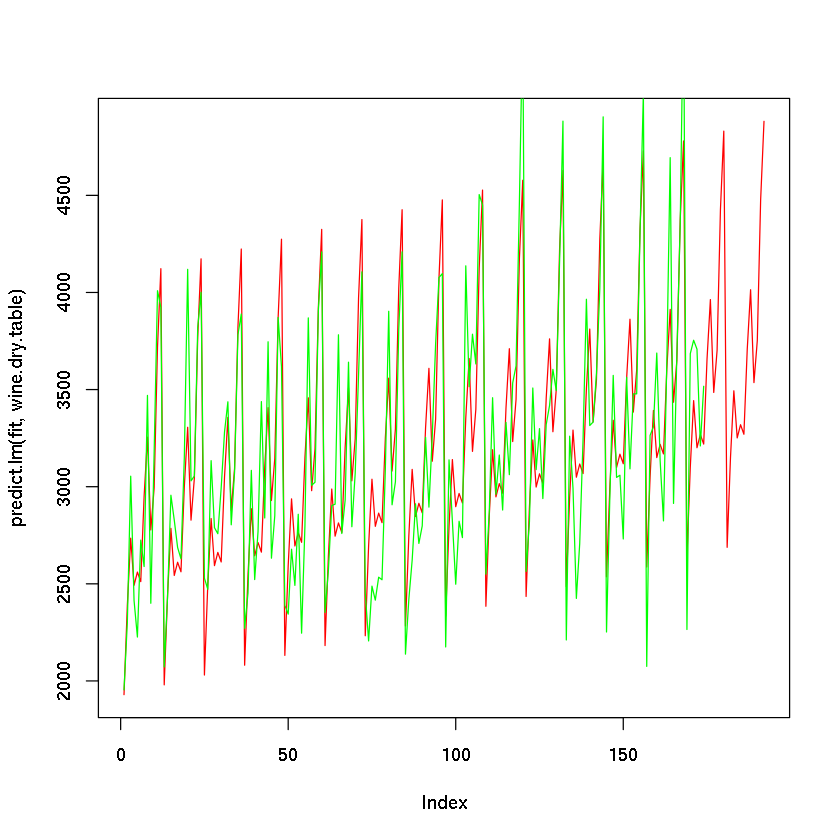

In [27]:
plot(predict.lm(fit, wine.dry.table), type = "l", col = "red")
points(wine.dry, type = "l", col = "green")

In [28]:
predict <- predict.lm(fit, wine.dry.table)[1:174]

Mean average error

In [29]:
mean(abs(predict - wine$dry))

[1] 249.2127

Root mean square error

In [30]:
sd(predict - wine$dry)

[1] 320.3326

Mean percentage error

In [31]:
mean((predict - wine$dry) / wine$dry) * 100

[1] 0.9456659

Mean absolute percentage error

In [32]:
mean(abs(predict - wine$dry) / wine$dry) * 100

[1] 7.961893

Absolute deviation

In [37]:
sum(abs(predict - mean(wine$dry)))

[1] 81150.85

Mean absolute deviation

In [34]:
mean(abs(predict - mean(wine$dry)))

[1] 466.3842

Coefficient of determination

In [35]:
var(predict - mean(wine$dry)) / var(wine$dry - mean(wine$dry))

[1] 0.779941

Theil index

In [36]:
sqrt(sum((predict - wine$dry)^2) / (sum((predict)^2) + sum((wine$dry)^2)))

[1] 0.06926824

 <a id='a7'></a>
## Assignment 7, exponential smoothing